In [27]:
import os

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
 
import seaborn as sns
import json
import pandas as pd

from IPython.core.debugger import Tracer

In [30]:
def make_dataframe(filename, trial_id, stride = 1, stop_point=500):
    with open(filename) as jfile:
        dat = json.load(jfile)
    for i in range(len(dat)):
        dat[i] = [trial_id] + dat[i]
    stop_point = min(stop_point, len(dat)-5)
    dat = dat[:stop_point:stride]
    df = pd.DataFrame(dat, columns=['trial_id','wall_time', 'step', 'value'])
    return df

In [28]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures_neurips'
save_name = 'error_test_cond_cifar_bs900.pdf'


# bs900_drop
file_names_ccnf_bs900 = ['./figures_neurips/result_data_published/run-900-ccnf-drop-1_error_validation-tag-error.json',
                        './figures_neurips/result_data_published/run-900-ccnf-drop-2_error_validation-tag-error.json',
                        './figures_neurips/result_data_published/run-900-ccnf-drop-3_error_validation-tag-error.json',]
keys_ccnf_bs900 = ['run1','run2','run3']
id_ccnf_bs900 = 'CCNF (baseline)'
stop_point_ccnf_bs900 = 500

# bs900_mc
file_names_info_bs900 = ['./figures_neurips/result_data_published/run-900-infocnf-1_error_validation-tag-error.json',
                      './figures_neurips/result_data_published/run-900-infocnf-2_error_validation-tag-error.json',
                      './figures_neurips/result_data_published/run-900-infocnf-3_error_validation-tag-error.json',]
keys_info_bs900 = ['run1','run2','run3']
id_info_bs900 = 'InfoCNF'
stop_point_info_bs900 = 500

# bs900_mc
file_names_infotune_bs900 = ['./figures_neurips/result_data_published/run-900-infotunecnf-1_error_validation-tag-error.json',
                      './figures_neurips/result_data_published/run-900-infotunecnf-2_error_validation-tag-error.json',
                      './figures_neurips/result_data_published/run-900-infotunecnf-3_error_validation-tag-error.json',]
keys_infotune_bs900 = ['run1','run2','run3']
id_infotune_bs900 = 'InfoCNF_tuned'
stop_point_infotune_bs900 = 500

# bs900_mc_drop
file_names_gate_bs900 = ['./figures_neurips/result_data_published/run-900-gatecnf-2_error_validation-tag-error.json',
                           './figures_neurips/result_data_published/run-900-gatecnf-3_error_validation-tag-error.json',]
keys_gate_bs900 = ['run1','run2','run3']
id_gate_bs900 = 'Gated InfoCNF'
stop_point_gate_bs900 = 500

184
193


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


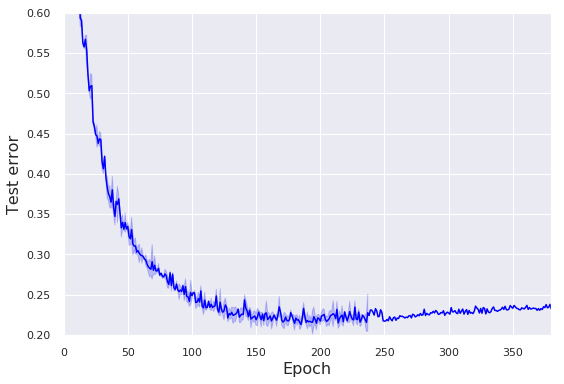

In [33]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    df_min = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
        stop_indx = min(500, len(df[-1]['value']))
        df_min.append(min(df[-1]['value'][:stop_indx]))
        print(np.argmin(df[-1]['value'][:stop_indx]))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot, df_min

# sns_plot, df_min_ccnf = plot_line(file_names_ccnf_bs900, keys_ccnf_bs900, id_ccnf_bs900, stride=10, stop_point=stop_point_ccnf_bs900, color='red')
# sns_plot, df_min_info = plot_line(file_names_info_bs900, keys_info_bs900, id_info_bs900, stride=10, stop_point=stop_point_info_bs900, color='green')
sns_plot, df_min_gate = plot_line(file_names_gate_bs900, keys_gate_bs900, id_gate_bs900, stride=1, stop_point=stop_point_gate_bs900, color='blue')
#sns_plot, df_min_infotune = plot_line(file_names_infotune_bs900, keys_infotune_bs900, id_infotune_bs900, stride=10, stop_point=stop_point_infotune_bs900, color='orange')

sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('Test error', fontsize = 16)
sns_plot.set_xlim(0,380)
sns_plot.set_ylim(0.2,0.6)
sns_plot.legend().set_visible(False)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [ ]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures_neurips'
save_name = 'nll_test_cond_cifar_bs900.pdf'

# bs900_drop
file_names_ccnf_bs900 = ['./figures_neurips/result_data_published/run-900-ccnf-drop-1_bits_per_dim_validation-tag-bits_per_dim.json',
                        './figures_neurips/result_data_published/run-900-ccnf-drop-2_bits_per_dim_validation-tag-bits_per_dim.json',
                        './figures_neurips/result_data_published/run-900-ccnf-drop-3_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_ccnf_bs900 = ['run1','run2','run3']
id_ccnf_bs900 = 'CCNF (baseline)'
stop_point_ccnf_bs900 = 500

# bs900_mc
file_names_info_bs900 = ['./figures_neurips/result_data_published/run-900-infocnf-1_bits_per_dim_validation-tag-bits_per_dim.json',
                      './figures_neurips/result_data_published/run-900-infocnf-2_bits_per_dim_validation-tag-bits_per_dim.json',
                      './figures_neurips/result_data_published/run-900-infocnf-3_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_info_bs900 = ['run1','run2','run3']
id_info_bs900 = 'InfoCNF'
stop_point_info_bs900 = 500

file_names_infotune_bs900 = ['./figures_neurips/result_data_published/run-900-infotunecnf-1_bits_per_dim_validation-tag-bits_per_dim.json',
                      './figures_neurips/result_data_published/run-900-infotunecnf-2_bits_per_dim_validation-tag-bits_per_dim.json',
                      './figures_neurips/result_data_published/run-900-infotunecnf-3_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_infotune_bs900 = ['run1','run2','run3']
id_infotune_bs900 = 'InfoCNF_tuned'
stop_point_infotune_bs900 = 500

# bs900_mc_drop
file_names_gate_bs900 = ['./figures_neurips/result_data_published/run-900-gatecnf-2_bits_per_dim_validation-tag-bits_per_dim.json',
                           './figures_neurips/result_data_published/run-900-gatecnf-3_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_gate_bs900 = ['run1','run2','run3']
id_gate_bs900 = 'Gated InfoCNF'
stop_point_gate_bs900 = 500

In [ ]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    df_min = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
        stop_indx = min(500, len(df[-1]['value']))
        df_min.append(min(df[-1]['value'][:stop_indx]))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot, df_min

sns_plot, df_min_ccnf = plot_line(file_names_ccnf_bs900, keys_ccnf_bs900, id_ccnf_bs900, stride=10, stop_point=stop_point_ccnf_bs900, color='red')
sns_plot, df_min_info = plot_line(file_names_info_bs900, keys_info_bs900, id_info_bs900, stride=10, stop_point=stop_point_info_bs900, color='green')
sns_plot, df_min_gate = plot_line(file_names_gate_bs900, keys_gate_bs900, id_gate_bs900, stride=10, stop_point=stop_point_gate_bs900, color='blue')
# sns_plot, df_min_infotune = plot_line(file_names_infotune_bs900, keys_infotune_bs900, id_infotune_bs900, stride=10, stop_point=stop_point_infotune_bs900, color='orange')


sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('NLL (bits/dim)', fontsize = 16)
sns_plot.set_xlim(0,380)
sns_plot.set_ylim(3.5,4.4)
sns_plot.legend().set_visible(False)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [ ]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures_neurips'
save_name = 'nfe_cond_cifar_bs900.pdf'


# bs900_drop
file_names_ccnf_bs900 = ['./figures_neurips/result_data_published/run-900-ccnf-drop-1_nfe_train_epoch-tag-nfe.json',
                        './figures_neurips/result_data_published/run-900-ccnf-drop-2_nfe_train_epoch-tag-nfe.json',
                        './figures_neurips/result_data_published/run-900-ccnf-drop-3_nfe_train_epoch-tag-nfe.json',]
keys_ccnf_bs900 = ['run1','run2','run3']
id_ccnf_bs900 = 'CCNF (baseline)'
stop_point_ccnf_bs900 = 500

# bs900_mc
file_names_info_bs900 = ['./figures_neurips/result_data_published/run-900-infocnf-1_nfe_train_epoch-tag-nfe.json',
                      './figures_neurips/result_data_published/run-900-infocnf-2_nfe_train_epoch-tag-nfe.json',
                      './figures_neurips/result_data_published/run-900-infocnf-3_nfe_train_epoch-tag-nfe.json',]
keys_info_bs900 = ['run1','run2','run3']
id_info_bs900 = 'InfoCNF'
stop_point_info_bs900 = 500

# bs900_mc
file_names_infotune_bs900 = ['./figures_neurips/result_data_published/run-900-infotunecnf-1_nfe_train_epoch-tag-nfe.json',
                      './figures_neurips/result_data_published/run-900-infotunecnf-2_nfe_train_epoch-tag-nfe.json',
                      './figures_neurips/result_data_published/run-900-infotunecnf-3_nfe_train_epoch-tag-nfe.json',]
keys_infotune_bs900 = ['run1','run2','run3']
id_infotune_bs900 = 'InfoCNF_tuned'
stop_point_infotune_bs900 = 500

# bs900_mc_drop
file_names_gate_bs900 = ['./figures_neurips/result_data_published/run-900-gatecnf-2_nfe_train_epoch-tag-nfe.json',
                           './figures_neurips/result_data_published/run-900-gatecnf-3_nfe_train_epoch-tag-nfe.json',]
keys_gate_bs900 = ['run1','run2','run3']
id_gate_bs900 = 'Gated InfoCNF'
stop_point_gate_bs900 = 500

In [ ]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    df_mean = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
        stop_indx = min(500, len(df[-1]['value']))
        df_mean.append(np.mean(df[-1]['value'][:stop_indx]))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot, df_mean

sns_plot, df_mean_ccnf = plot_line(file_names_ccnf_bs900, keys_ccnf_bs900, id_ccnf_bs900, stride=10, stop_point=stop_point_ccnf_bs900, color='red')
sns_plot, df_mean_info = plot_line(file_names_info_bs900, keys_info_bs900, id_info_bs900, stride=10, stop_point=stop_point_info_bs900, color='green')
sns_plot, df_mean_gate = plot_line(file_names_gate_bs900, keys_gate_bs900, id_gate_bs900, stride=10, stop_point=stop_point_gate_bs900, color='blue')
# sns_plot, df_mean_infotune = plot_line(file_names_infotune_bs900, keys_infotune_bs900, id_infotune_bs900, stride=10, stop_point=stop_point_infotune_bs900, color='orange')

sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('# Function Evaluations', fontsize = 16)
sns_plot.set_xlim(0,380)
sns_plot.legend().set_visible(False)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [ ]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures_neurips'
save_name = 'error_test_cond_cifar_bs8k.pdf'

# bs8k_drop
file_names_ccnf_bs8k = ['./figures_neurips/result_data_published/run-8k-ccnf-drop-1_error_validation-tag-error.json',
                        './figures_neurips/result_data_published/run-8k-ccnf-drop-2_error_validation-tag-error.json',
                        ]
keys_ccnf_bs8k = ['run1','run2']
id_ccnf_bs8k = 'CCNF (baseline)'
stop_point_ccnf_bs8k = 500

# bs8k_mc
file_names_info_bs8k = ['./figures_neurips/result_data_published/run-8k-infocnf-drop-1_error_validation-tag-error.json',
                      './figures_neurips/result_data_published/run-8k-infocnf-drop-2_error_validation-tag-error.json',
                      './figures_neurips/result_data_published/run-8k-infocnf-drop-3_error_validation-tag-error.json',]
keys_info_bs8k = ['run1','run2','run3']
id_info_bs8k = 'InfoCNF'
stop_point_info_bs8k = 500

# b8k_mc_drop
file_names_gate_std15_bs8k = ['./figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-1_error_validation-tag-error.json',
                        './figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-2_error_validation-tag-error.json',
                        './figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-3_error_validation-tag-error.json',]
keys_gate_std15_bs8k = ['run1','run2','run3']
id_gate_std15_bs8k = 'Gated InfoCNF'
stop_point_std15_gate_bs8k = 500

In [ ]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    df_min = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
        stop_indx = min(500, len(df[-1]['value']))
        df_min.append(min(df[-1]['value'][:stop_indx]))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot, df_min

sns_plot, _ = plot_line(file_names_ccnf_bs8k, keys_ccnf_bs8k, id_ccnf_bs8k, stride=20, stop_point=stop_point_ccnf_bs8k, color='red')
sns_plot, _ = plot_line(file_names_info_bs8k, keys_info_bs8k, id_info_bs8k, stride=10, stop_point=stop_point_info_bs8k, color='green')
sns_plot, _ = plot_line(file_names_gate_std15_bs8k, keys_gate_std15_bs8k, id_gate_std15_bs8k, stride=10, stop_point=stop_point_std15_gate_bs8k, color='blue')

# sns_plot, df_min_ccnf = plot_line(file_names_ccnf_bs8k, keys_ccnf_bs8k, id_ccnf_bs8k, stride=1, stop_point=stop_point_ccnf_bs8k, color='red')
# sns_plot, df_min_info = plot_line(file_names_info_bs8k, keys_info_bs8k, id_info_bs8k, stride=1, stop_point=stop_point_info_bs8k, color='green')
# sns_plot, df_min_gate = plot_line(file_names_gate_std15_bs8k, keys_gate_std15_bs8k, id_gate_std15_bs8k, stride=1, stop_point=stop_point_std15_gate_bs8k, color='blue')

sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('Test error', fontsize = 16)
sns_plot.set_xlim(0,380)
sns_plot.set_ylim(0.2,0.6)
sns_plot.legend().set_visible(False)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [ ]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures_neurips'
save_name = 'nll_test_cond_cifar_bs8k.pdf'

# bs8k_drop
file_names_ccnf_bs8k = ['./figures_neurips/result_data_published/run-8k-ccnf-drop-1_bits_per_dim_validation-tag-bits_per_dim.json',
                        './figures_neurips/result_data_published/run-8k-ccnf-drop-2_bits_per_dim_validation-tag-bits_per_dim.json',
                        ]
keys_ccnf_bs8k = ['run1','run2']
id_ccnf_bs8k = 'CCNF (baseline)'
stop_point_ccnf_bs8k = 500

# bs8k_mc
file_names_info_bs8k = ['./figures_neurips/result_data_published/run-8k-infocnf-drop-1_bits_per_dim_validation-tag-bits_per_dim.json',
                      './figures_neurips/result_data_published/run-8k-infocnf-drop-2_bits_per_dim_validation-tag-bits_per_dim.json',
                      './figures_neurips/result_data_published/run-8k-infocnf-drop-3_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_info_bs8k = ['run1','run2','run3']
id_info_bs8k = 'InfoCNF'
stop_point_info_bs8k = 500

# b8k_mc_drop
file_names_gate_std15_bs8k = ['./figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-1_bits_per_dim_validation-tag-bits_per_dim.json',
                        './figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-2_bits_per_dim_validation-tag-bits_per_dim.json',
                        './figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-3_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_gate_std15_bs8k = ['run1','run2','run3']
id_gate_std15_bs8k = 'Gated InfoCNF'
stop_point_std15_gate_bs8k = 500

In [ ]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    df_min = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
        stop_indx = min(500, len(df[-1]['value']))
        df_min.append(min(df[-1]['value'][:stop_indx]))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot, df_min

sns_plot, _ = plot_line(file_names_ccnf_bs8k, keys_ccnf_bs8k, id_ccnf_bs8k, stride=20, stop_point=stop_point_ccnf_bs8k, color='red')
sns_plot, _ = plot_line(file_names_info_bs8k, keys_info_bs8k, id_info_bs8k, stride=10, stop_point=stop_point_info_bs8k, color='green')
sns_plot, _ = plot_line(file_names_gate_std15_bs8k, keys_gate_std15_bs8k, id_gate_std15_bs8k, stride=10, stop_point=stop_point_std15_gate_bs8k, color='blue')

sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('NLL (bits/dim)', fontsize = 16)
sns_plot.set_xlim(0,380)
sns_plot.set_ylim(3.6,4.5)
sns_plot.legend().set_visible(False)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [ ]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures_neurips'
save_name = 'nfe_cond_cifar_bs8k.pdf'

# bs8k_drop
file_names_ccnf_bs8k = ['./figures_neurips/result_data_published/run-8k-ccnf-drop-1_nfe_train_epoch-tag-nfe.json',
                        './figures_neurips/result_data_published/run-8k-ccnf-drop-2_nfe_train_epoch-tag-nfe.json',
                        ]
keys_ccnf_bs8k = ['run1','run2']
id_ccnf_bs8k = 'CCNF (baseline)'
stop_point_ccnf_bs8k = 500

# bs8k_mc
file_names_info_bs8k = ['./figures_neurips/result_data_published/run-8k-infocnf-drop-1_nfe_train_epoch-tag-nfe.json',
                      './figures_neurips/result_data_published/run-8k-infocnf-drop-2_nfe_train_epoch-tag-nfe.json',
                      './figures_neurips/result_data_published/run-8k-infocnf-drop-3_nfe_train_epoch-tag-nfe.json',]
keys_info_bs8k = ['run1','run2','run3']
id_info_bs8k = 'InfoCNF'
stop_point_info_bs8k = 500

# b8k_mc_drop
file_names_gate_std15_bs8k = ['./figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-1_nfe_train_epoch-tag-nfe.json',
                        './figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-2_nfe_train_epoch-tag-nfe.json',
                        './figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-3_nfe_train_epoch-tag-nfe.json',]
keys_gate_std15_bs8k = ['run1','run2','run3']
id_gate_std15_bs8k = 'Gated InfoCNF'
stop_point_std15_gate_bs8k = 500

In [ ]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    df_mean = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
        stop_indx = min(500, len(df[-1]['value']))
        df_mean.append(np.mean(df[-1]['value'][:stop_indx]))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot, df_mean

sns_plot, _ = plot_line(file_names_ccnf_bs8k, keys_ccnf_bs8k, id_ccnf_bs8k, stride=20, stop_point=stop_point_ccnf_bs8k, color='red')
sns_plot, _ = plot_line(file_names_info_bs8k, keys_info_bs8k, id_info_bs8k, stride=20, stop_point=stop_point_info_bs8k, color='green')
sns_plot, _ = plot_line(file_names_gate_std15_bs8k, keys_gate_std15_bs8k, id_gate_std15_bs8k, stride=20, stop_point=stop_point_std15_gate_bs8k, color='blue')

sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('# Function Evaluations', fontsize = 16)
sns_plot.set_xlim(0,380)
sns_plot.legend().set_visible(False)
# sns_plot.set_ylim(0.27,0.6)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [ ]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures_neurips'
save_name = 'nll_test_uncond_cifar_bs900.pdf'

# bs900_drop
file_names_cnf_bs900 = ['./figures_neurips/result_data_published/run-900_run2_bits_per_dim_validation-tag-bits_per_dim.json',
                        './figures_neurips/result_data_published/run-900_run3_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_cnf_bs900 = ['run2','run3']
id_cnf_bs900 = 'CNF (baseline)'
stop_point_cnf_bs900 = 500

# bs900_mc_drop
file_names_gate_bs900 = ['./figures_neurips/result_data_published/run-900_rl_std_6_run2_bits_per_dim_validation-tag-bits_per_dim.json',
                           './figures_neurips/result_data_published/run-900_rl_std_6_run3_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_gate_bs900 = ['run2','run3']
id_gate_bs900 = 'Gated CNF'
stop_point_gate_bs900 = 500

In [ ]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    df_min = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
        stop_indx = min(500, len(df[-1]['value']))
        df_min.append(min(df[-1]['value'][:stop_indx]))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot, df_min

sns_plot, df_min_ccnf = plot_line(file_names_cnf_bs900, keys_cnf_bs900, id_cnf_bs900, stride=10, stop_point=stop_point_cnf_bs900, color='red')
sns_plot, df_min_gate = plot_line(file_names_gate_bs900, keys_gate_bs900, id_gate_bs900, stride=10, stop_point=stop_point_gate_bs900, color='blue')

sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('NLL (bits/dim)', fontsize = 16)
sns_plot.set_xlim(0,380)
sns_plot.set_ylim(3.35,3.85)
sns_plot.legend().set_visible(False)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [ ]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures_neurips'
save_name = 'nfe_uncond_cifar_bs900.pdf'

# bs900_drop
file_names_cnf_bs900 = ['./figures_neurips/result_data_published/run-900_run2_nfe_train_epoch-tag-nfe.json',
                        './figures_neurips/result_data_published/run-900_run3_nfe_train_epoch-tag-nfe.json',]
keys_cnf_bs900 = ['run2','run3']
id_cnf_bs900 = 'CNF (baseline)'
stop_point_cnf_bs900 = 500

# bs900_mc_drop
file_names_gate_bs900 = ['./figures_neurips/result_data_published/run-900_rl_std_6_run2_nfe_train_epoch-tag-nfe.json',
                           './figures_neurips/result_data_published/run-900_rl_std_6_run3_nfe_train_epoch-tag-nfe.json',]
keys_gate_bs900 = ['run2','run3']
id_gate_bs900 = 'Gated CNF'
stop_point_gate_bs900 = 500

In [ ]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    df_mean = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
        stop_indx = min(500, len(df[-1]['value']))
        df_mean.append(np.mean(df[-1]['value'][:stop_indx]))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot, df_mean

sns_plot, df_mean_ccnf = plot_line(file_names_cnf_bs900, keys_cnf_bs900, id_cnf_bs900, stride=10, stop_point=stop_point_cnf_bs900, color='red')
sns_plot, df_mean_gate = plot_line(file_names_gate_bs900, keys_gate_bs900, id_gate_bs900, stride=10, stop_point=stop_point_gate_bs900, color='blue')

sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('# Function Evaluations', fontsize = 16)
sns_plot.set_xlim(0,380)
sns_plot.legend().set_visible(False)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [ ]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures_neurips'
save_name = 'error_test_large_batches_methods.pdf'

# bs8k_drop
file_names_ccnf_bs8k = ['./figures_neurips/result_data_published/run-8k-ccnf-drop-1_error_validation-tag-error.json',
                        './figures_neurips/result_data_published/run-8k-ccnf-drop-2_error_validation-tag-error.json',
                        ]
keys_ccnf_bs8k = ['run1','run2']
id_ccnf_bs8k = 'CCNF'
stop_point_ccnf_bs8k = 500

# bs8k_mc
file_names_info_bs8k = ['./figures_neurips/result_data_published/run-8k-infocnf-drop-1_error_validation-tag-error.json',
                      './figures_neurips/result_data_published/run-8k-infocnf-drop-2_error_validation-tag-error.json',
                      './figures_neurips/result_data_published/run-8k-infocnf-drop-3_error_validation-tag-error.json',]
keys_info_bs8k = ['run1','run2','run3']
id_info_bs8k = 'InfoCNF'
stop_point_info_bs8k = 500

# bs8k_baseline_ccnf
file_names_ccnf_bl_bs8k = ['./figures_neurips/result_data_published/run-8k-ccnf-drop-baseline-1_error_validation-tag-error.json',]
keys_ccnf_bl_bs8k = ['run1',]
id_ccnf_bl_bs8k = 'CCNF without large lr \n and adjusted tolerance'
stop_point_ccnf_bl_bs8k = 500

# bs8k_baseline_ccnf
file_names_info_bl_bs8k = ['./figures_neurips/result_data_published/run-8k-infocnf-drop-baseline-1_error_validation-tag-error.json',]
keys_info_bl_bs8k = ['run1',]
id_info_bl_bs8k = 'InfoCNF without large lr \n and adjusted tolerance'
stop_point_info_bl_bs8k = 500

In [ ]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot

sns_plot = plot_line(file_names_ccnf_bs8k, keys_ccnf_bs8k, id_ccnf_bs8k, stride=20, stop_point=stop_point_ccnf_bs8k, color='red')
sns_plot = plot_line(file_names_info_bs8k, keys_info_bs8k, id_info_bs8k, stride=10, stop_point=stop_point_info_bs8k, color='green')
sns_plot = plot_line(file_names_ccnf_bl_bs8k, keys_ccnf_bl_bs8k, id_ccnf_bl_bs8k, stride=10, stop_point=stop_point_ccnf_bl_bs8k, color='magenta')
sns_plot = plot_line(file_names_info_bl_bs8k, keys_info_bl_bs8k, id_info_bl_bs8k, stride=10, stop_point=stop_point_info_bl_bs8k, color='purple')

sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('Test error', fontsize = 16)
sns_plot.set_xlim(0,380)
sns_plot.set_ylim(0.3,0.8)
sns_plot.legend().set_visible(False)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [ ]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures_neurips'
save_name = 'nll_test_large_batches_methods.pdf'

# bs8k_drop
file_names_ccnf_bs8k = ['./figures_neurips/result_data_published/run-8k-ccnf-drop-1_bits_per_dim_validation-tag-bits_per_dim.json',
                        './figures_neurips/result_data_published/run-8k-ccnf-drop-2_bits_per_dim_validation-tag-bits_per_dim.json',
                        ]
keys_ccnf_bs8k = ['run1','run2']
id_ccnf_bs8k = 'CCNF'
stop_point_ccnf_bs8k = 500

# bs8k_mc
file_names_info_bs8k = ['./figures_neurips/result_data_published/run-8k-infocnf-drop-1_bits_per_dim_validation-tag-bits_per_dim.json',
                      './figures_neurips/result_data_published/run-8k-infocnf-drop-2_bits_per_dim_validation-tag-bits_per_dim.json',
                      './figures_neurips/result_data_published/run-8k-infocnf-drop-3_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_info_bs8k = ['run1','run2','run3']
id_info_bs8k = 'InfoCNF'
stop_point_info_bs8k = 500

# bs8k_baseline_ccnf
file_names_ccnf_bl_bs8k = ['./figures_neurips/result_data_published/run-8k-ccnf-drop-baseline-1_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_ccnf_bl_bs8k = ['run1',]
id_ccnf_bl_bs8k = 'CCNF without large lr \n and adjusted tolerance'
stop_point_ccnf_bl_bs8k = 500

# bs8k_baseline_ccnf
file_names_info_bl_bs8k = ['./figures_neurips/result_data_published/run-8k-infocnf-drop-baseline-1_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_info_bl_bs8k = ['run1',]
id_info_bl_bs8k = 'InfoCNF without large lr \n and adjusted tolerance'
stop_point_info_bl_bs8k = 500

In [ ]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot

sns_plot = plot_line(file_names_ccnf_bs8k, keys_ccnf_bs8k, id_ccnf_bs8k, stride=20, stop_point=stop_point_ccnf_bs8k, color='red')
sns_plot = plot_line(file_names_info_bs8k, keys_info_bs8k, id_info_bs8k, stride=10, stop_point=stop_point_info_bs8k, color='green')
sns_plot = plot_line(file_names_ccnf_bl_bs8k, keys_ccnf_bl_bs8k, id_ccnf_bl_bs8k, stride=10, stop_point=stop_point_ccnf_bl_bs8k, color='magenta')
sns_plot = plot_line(file_names_info_bl_bs8k, keys_info_bl_bs8k, id_info_bl_bs8k, stride=10, stop_point=stop_point_info_bl_bs8k, color='purple')

sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('NLL (bits/dim)', fontsize = 16)
sns_plot.set_xlim(0,380)
sns_plot.set_ylim(3.6,5.0)
sns_plot.legend().set_visible(False)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [ ]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures_neurips'
save_name = 'nfe_large_batches_methods.pdf'

# bs8k_drop
file_names_ccnf_bs8k = ['./figures_neurips/result_data_published/run-8k-ccnf-drop-1_nfe_train_epoch-tag-nfe.json',
                        './figures_neurips/result_data_published/run-8k-ccnf-drop-2_nfe_train_epoch-tag-nfe.json',
                        ]
keys_ccnf_bs8k = ['run1','run2']
id_ccnf_bs8k = 'CCNF'
stop_point_ccnf_bs8k = 500

# bs8k_mc
file_names_info_bs8k = ['./figures_neurips/result_data_published/run-8k-infocnf-drop-1_nfe_train_epoch-tag-nfe.json',
                      './figures_neurips/result_data_published/run-8k-infocnf-drop-2_nfe_train_epoch-tag-nfe.json',
                      './figures_neurips/result_data_published/run-8k-infocnf-drop-3_nfe_train_epoch-tag-nfe.json',]
keys_info_bs8k = ['run1','run2','run3']
id_info_bs8k = 'InfoCNF'
stop_point_info_bs8k = 500

# bs8k_baseline_ccnf
file_names_ccnf_bl_bs8k = ['./figures_neurips/result_data_published/run-8k-ccnf-drop-baseline-1_nfe_train_epoch-tag-nfe.json',]
keys_ccnf_bl_bs8k = ['run1',]
id_ccnf_bl_bs8k = 'CCNF without large lr \n and adjusted tolerance'
stop_point_ccnf_bl_bs8k = 500

# bs8k_baseline_ccnf
file_names_info_bl_bs8k = ['./figures_neurips/result_data_published/run-8k-infocnf-drop-baseline-1_nfe_train_epoch-tag-nfe.json',]
keys_info_bl_bs8k = ['run1',]
id_info_bl_bs8k = 'InfoCNF without large lr \n and adjusted tolerance'
stop_point_info_bl_bs8k = 500

In [ ]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot

sns_plot = plot_line(file_names_ccnf_bs8k, keys_ccnf_bs8k, id_ccnf_bs8k, stride=20, stop_point=stop_point_ccnf_bs8k, color='red')
sns_plot = plot_line(file_names_info_bs8k, keys_info_bs8k, id_info_bs8k, stride=10, stop_point=stop_point_info_bs8k, color='green')
sns_plot = plot_line(file_names_ccnf_bl_bs8k, keys_ccnf_bl_bs8k, id_ccnf_bl_bs8k, stride=10, stop_point=stop_point_ccnf_bl_bs8k, color='magenta')
sns_plot = plot_line(file_names_info_bl_bs8k, keys_info_bl_bs8k, id_info_bl_bs8k, stride=10, stop_point=stop_point_info_bl_bs8k, color='purple')

sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('# Function Evaluations', fontsize = 16)
sns_plot.set_xlim(0,380)
sns_plot.set_ylim(500,900)
sns_plot.legend().set_visible(False)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [ ]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures_neurips'

# gate 8k
file_names_gate_std15_bs8k = ['./figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-1_error_validation-tag-error.json',
                        './figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-2_error_validation-tag-error.json',
                        './figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-3_error_validation-tag-error.json',]
keys_gate_std15_bs8k = ['run1','run2','run3']
id_gate_std15_bs8k = 'Gated InfoCNF - large batch'
stop_point_std15_gate_bs8k = 500

# 900 baseline
file_names_ccnf_bs900 = ['./figures_neurips/result_data_published/run-900-ccnf-drop-1_error_validation-tag-error.json',
                        './figures_neurips/result_data_published/run-900-ccnf-drop-2_error_validation-tag-error.json',
                        './figures_neurips/result_data_published/run-900-ccnf-drop-3_error_validation-tag-error.json',]
keys_ccnf_bs900 = ['run1','run2','run3']
id_ccnf_bs900 = 'CCNF - small batch (baseline)'
stop_point_ccnf_bs900 = 500

# gate 900
file_names_gate_bs900 = ['./figures_neurips/result_data_published/run-900-gatecnf-2_error_validation-tag-error.json',
                           './figures_neurips/result_data_published/run-900-gatecnf-3_error_validation-tag-error.json',]
keys_gate_bs900 = ['run1','run2','run3']
id_gate_bs900 = 'Gated InfoCNF - small batch'
stop_point_gate_bs900 = 500


###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

# gate 8k
file_names_gate_std15_bs8k_t = ['./figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-1_nfe_train_epoch-tag-nfe.json',
                        './figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-2_nfe_train_epoch-tag-nfe.json',
                        './figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-3_nfe_train_epoch-tag-nfe.json',]
keys_gate_std15_bs8k = ['run1','run2','run3']
id_gate_std15_bs8k = 'Gated InfoCNF - large batch'
stop_point_std15_gate_bs8k = 500

# 900 baseline
file_names_ccnf_bs900_t = ['./figures_neurips/result_data_published/run-900-ccnf-drop-1_nfe_train_epoch-tag-nfe.json',
                        './figures_neurips/result_data_published/run-900-ccnf-drop-2_nfe_train_epoch-tag-nfe.json',
                        './figures_neurips/result_data_published/run-900-ccnf-drop-3_nfe_train_epoch-tag-nfe.json',]
keys_ccnf_bs900 = ['run1','run2','run3']
id_ccnf_bs900 = 'CCNF - small batch (baseline)'
stop_point_ccnf_bs900 = 500

# gate 900
file_names_gate_bs900_t = ['./figures_neurips/result_data_published/run-900-gatecnf-2_nfe_train_epoch-tag-nfe.json',
                           './figures_neurips/result_data_published/run-900-gatecnf-3_nfe_train_epoch-tag-nfe.json',]
keys_gate_bs900 = ['run1','run2','run3']
id_gate_bs900 = 'Gated InfoCNF - small batch'
stop_point_gate_bs900 = 500

In [ ]:
sns.set(style="darkgrid")
def make_dataframe_loss_vs_time(filenames_time, filenames_loss, keys, trial_id, color=None, stride = 1, stop_point=500):
    dat_t = 0
    stop_point_t = 500
    for fnt in filenames_time:
        with open(fnt) as jft:
            dat_tf = json.load(jft)
    
        stop_point_t = min(stop_point_t, len(dat_tf))
        
    for fnt in filenames_time:
        with open(fnt) as jft:
            dat_tf = json.load(jft)
        try:
            dat_t = dat_t + np.array(dat_tf[0:stop_point_t])
        except:
            print(fnt)
            Tracer()()
    
    dat_t /= len(filenames_time)
    dat_t = list(np.cumsum(dat_t[:,2]))
    stop_point_t = min(stop_point, len(dat_t))
    
    df = []
    stop_point_l = 500
    for fnl in filenames_loss:
        with open(fnl) as jfl:
            dat_l = json.load(jfl)
        stop_point_l = min(stop_point_l, stop_point_t, len(dat_l))
        
    for fnl in filenames_loss:
        with open(fnl) as jfl:
            dat_l = json.load(jfl)
        dat_l = dat_l[:stop_point_l:stride]
        df_l  = pd.DataFrame(dat_l, columns=['wall_time', 'step', 'value'])
        try:
            df_l['step_time'] = dat_t[:stop_point_l:stride]
        except:
            print(fnl)
            Tracer()()
        df.append(df_l)
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step_time", y="value", data=df, label=trial_id, color=color)
    
    return sns_plot

save_name = 'test_error_vs_time_cond_cifar_bs900_8k.pdf'

sns_plot = make_dataframe_loss_vs_time(file_names_ccnf_bs900_t, file_names_ccnf_bs900, keys_ccnf_bs900, id_ccnf_bs900, stride = 10, stop_point=stop_point_ccnf_bs900, color='red')
sns_plot = make_dataframe_loss_vs_time(file_names_gate_bs900_t, file_names_gate_bs900, keys_gate_bs900, id_gate_bs900, stride = 10, stop_point=stop_point_gate_bs900, color='deepskyblue')
sns_plot = make_dataframe_loss_vs_time(file_names_gate_std15_bs8k_t, file_names_gate_std15_bs8k, keys_gate_std15_bs8k, id_gate_std15_bs8k, stride = 10, stop_point=stop_point_std15_gate_bs8k, color='blue')

sns_plot.set_xlabel('# Function Evaluations', fontsize = 16)
sns_plot.set_ylabel('Test error', fontsize = 16)
sns_plot.set_ylim(0.2,0.8)
sns_plot.legend().set_visible(False)
#sns_plot.set_xlim(0.0,200000)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [ ]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures_neurips'

# gate 8k
file_names_gate_std15_bs8k = ['./figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-1_bits_per_dim_validation-tag-bits_per_dim.json',
                        './figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-2_bits_per_dim_validation-tag-bits_per_dim.json',
                        './figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-3_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_gate_std15_bs8k = ['run1','run2','run3']
id_gate_std15_bs8k = 'Gated InfoCNF - large batch'
stop_point_std15_gate_bs8k = 500

# 900 baseline
file_names_ccnf_bs900 = ['./figures_neurips/result_data_published/run-900-ccnf-drop-1_bits_per_dim_validation-tag-bits_per_dim.json',
                        './figures_neurips/result_data_published/run-900-ccnf-drop-2_bits_per_dim_validation-tag-bits_per_dim.json',
                        './figures_neurips/result_data_published/run-900-ccnf-drop-3_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_ccnf_bs900 = ['run1','run2','run3']
id_ccnf_bs900 = 'CCNF - small batch (baseline)'
stop_point_ccnf_bs900 = 500

# gate 900
file_names_gate_bs900 = ['./figures_neurips/result_data_published/run-900-gatecnf-2_bits_per_dim_validation-tag-bits_per_dim.json',
                           './figures_neurips/result_data_published/run-900-gatecnf-3_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_gate_bs900 = ['run1','run2','run3']
id_gate_bs900 = 'Gated InfoCNF - small batch'
stop_point_gate_bs900 = 500


###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

# gate 8k
file_names_gate_std15_bs8k_t = ['./figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-1_nfe_train_epoch-tag-nfe.json',
                        './figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-2_nfe_train_epoch-tag-nfe.json',
                        './figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-3_nfe_train_epoch-tag-nfe.json',]
keys_gate_std15_bs8k = ['run1','run2','run3']
id_gate_std15_bs8k = 'Gated InfoCNF - large batch'
stop_point_std15_gate_bs8k = 500

# 900 baseline
file_names_ccnf_bs900_t = ['./figures_neurips/result_data_published/run-900-ccnf-drop-1_nfe_train_epoch-tag-nfe.json',
                        './figures_neurips/result_data_published/run-900-ccnf-drop-2_nfe_train_epoch-tag-nfe.json',
                        './figures_neurips/result_data_published/run-900-ccnf-drop-3_nfe_train_epoch-tag-nfe.json',]
keys_ccnf_bs900 = ['run1','run2','run3']
id_ccnf_bs900 = 'CCNF - small batch (baseline)'
stop_point_ccnf_bs900 = 500

# gate 900
file_names_gate_bs900_t = ['./figures_neurips/result_data_published/run-900-gatecnf-2_nfe_train_epoch-tag-nfe.json',
                           './figures_neurips/result_data_published/run-900-gatecnf-3_nfe_train_epoch-tag-nfe.json',]
keys_gate_bs900 = ['run1','run2','run3']
id_gate_bs900 = 'Gated InfoCNF - small batch'
stop_point_gate_bs900 = 500

In [ ]:
sns.set(style="darkgrid")
def make_dataframe_loss_vs_time(filenames_time, filenames_loss, keys, trial_id, color=None, stride = 1, stop_point=500):
    dat_t = 0
    stop_point_t = 500
    for fnt in filenames_time:
        with open(fnt) as jft:
            dat_tf = json.load(jft)
    
        stop_point_t = min(stop_point_t, len(dat_tf))
        
    for fnt in filenames_time:
        with open(fnt) as jft:
            dat_tf = json.load(jft)
        try:
            dat_t = dat_t + np.array(dat_tf[0:stop_point_t])
        except:
            print(fnt)
            Tracer()()
    
    dat_t /= len(filenames_time)
    dat_t = list(np.cumsum(dat_t[:,2]))
    stop_point_t = min(stop_point, len(dat_t))
    
    df = []
    stop_point_l = 500
    for fnl in filenames_loss:
        with open(fnl) as jfl:
            dat_l = json.load(jfl)
        stop_point_l = min(stop_point_l, stop_point_t, len(dat_l))
        
    for fnl in filenames_loss:
        with open(fnl) as jfl:
            dat_l = json.load(jfl)
        dat_l = dat_l[:stop_point_l:stride]
        df_l  = pd.DataFrame(dat_l, columns=['wall_time', 'step', 'value'])
        try:
            df_l['step_time'] = dat_t[:stop_point_l:stride]
        except:
            print(fnl)
            Tracer()()
        df.append(df_l)
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step_time", y="value", data=df, label=trial_id, color=color)
    
    return sns_plot

save_name = 'test_nll_vs_time_cond_cifar_bs900_8k.pdf'

sns_plot = make_dataframe_loss_vs_time(file_names_ccnf_bs900_t, file_names_ccnf_bs900, keys_ccnf_bs900, id_ccnf_bs900, stride = 10, stop_point=stop_point_ccnf_bs900, color='red')
sns_plot = make_dataframe_loss_vs_time(file_names_gate_bs900_t, file_names_gate_bs900, keys_gate_bs900, id_gate_bs900, stride = 10, stop_point=stop_point_gate_bs900, color='deepskyblue')
sns_plot = make_dataframe_loss_vs_time(file_names_gate_std15_bs8k_t, file_names_gate_std15_bs8k, keys_gate_std15_bs8k, id_gate_std15_bs8k, stride = 10, stop_point=stop_point_std15_gate_bs8k, color='blue')

sns_plot.set_xlabel('# Function Evaluations', fontsize = 16)
sns_plot.set_ylabel('NLL (bits/dim)', fontsize = 16)
sns_plot.set_ylim(3.4,5.0)
sns_plot.legend().set_visible(False)
#sns_plot.set_xlim(0.0,200000)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [ ]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures_neurips'
save_name = 'marginal_nll_test_cond_cifar_bs900.pdf'

# bs900_drop
file_names_ccnf_bs900 = ['./figures_neurips/result_data_published/run-900_ccnf_run1_nll_marginal_validation-tag-nll_marginal.json',
                        './figures_neurips/result_data_published/run-900_ccnf_run2_nll_marginal_validation-tag-nll_marginal.json',
                        './figures_neurips/result_data_published/run-900_ccnf_run3_nll_marginal_validation-tag-nll_marginal.json',]
keys_ccnf_bs900 = ['run1','run2','run3']
id_ccnf_bs900 = 'CCNF (baseline)'
stop_point_ccnf_bs900 = 500

# bs900_mc
file_names_info_bs900 = ['./figures_neurips/result_data_published/run-900_info_run1_nll_marginal_validation-tag-nll_marginal.json',
                      './figures_neurips/result_data_published/run-900_info_run2_nll_marginal_validation-tag-nll_marginal.json',
                      './figures_neurips/result_data_published/run-900_info_run3_nll_marginal_validation-tag-nll_marginal.json',]
keys_info_bs900 = ['run1','run2','run3']
id_info_bs900 = 'InfoCNF'
stop_point_info_bs900 = 500

# bs900_mc_drop
file_names_gate_bs900 = ['./figures_neurips/result_data_published/run-900_gate_std_6_run2_nll_marginal_validation-tag-nll_marginal.json',
                           './figures_neurips/result_data_published/run-900_gate_std_6_run3_nll_marginal_validation-tag-nll_marginal.json',]
keys_gate_bs900 = ['run2','run3']
id_gate_bs900 = 'Gated InfoCNF'
stop_point_gate_bs900 = 500

In [ ]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    df_min = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
        stop_indx = min(500, len(df[-1]['value']))
        df_min.append(min(df[-1]['value'][:stop_indx]))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot, df_min

sns_plot, df_min_ccnf = plot_line(file_names_ccnf_bs900, keys_ccnf_bs900, id_ccnf_bs900, stride=10, stop_point=stop_point_ccnf_bs900, color='red')
sns_plot, df_min_info = plot_line(file_names_info_bs900, keys_info_bs900, id_info_bs900, stride=10, stop_point=stop_point_info_bs900, color='green')
sns_plot, df_min_gate = plot_line(file_names_gate_bs900, keys_gate_bs900, id_gate_bs900, stride=10, stop_point=stop_point_gate_bs900, color='blue')

sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('-logp(x) (bits/dim)', fontsize = 16)
sns_plot.set_xlim(0,380)
sns_plot.set_ylim(3.5,4.2)
sns_plot.legend().set_visible(False)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [ ]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures_neurips'
save_name = 'nll_marginal_test_cond_cifar_bs8k.pdf'

# bs8k_drop
file_names_ccnf_bs8k = ['./figures_neurips/result_data_published/run-8k-ccnf-drop-1_nll_marginal_validation-tag-nll_marginal.json',
                        './figures_neurips/result_data_published/run-8k-ccnf-drop-2_nll_marginal_validation-tag-nll_marginal.json',
                        ]
keys_ccnf_bs8k = ['run1','run2']
id_ccnf_bs8k = 'CCNF (baseline)'
stop_point_ccnf_bs8k = 500

# bs8k_mc
file_names_info_bs8k = ['./figures_neurips/result_data_published/run-8k-infocnf-drop-1_nll_marginal_validation-tag-nll_marginal.json',
                      './figures_neurips/result_data_published/run-8k-infocnf-drop-2_nll_marginal_validation-tag-nll_marginal.json',
                      './figures_neurips/result_data_published/run-8k-infocnf-drop-3_nll_marginal_validation-tag-nll_marginal.json',]
keys_info_bs8k = ['run1','run2','run3']
id_info_bs8k = 'InfoCNF'
stop_point_info_bs8k = 500

# b8k_mc_drop
file_names_gate_std15_bs8k = ['./figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-1_nll_marginal_validation-tag-nll_marginal.json',
                        './figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-2_nll_marginal_validation-tag-nll_marginal.json',
                        './figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-3_nll_marginal_validation-tag-nll_marginal.json',]
keys_gate_std15_bs8k = ['run1','run2','run3']
id_gate_std15_bs8k = 'Gated InfoCNF'
stop_point_std15_gate_bs8k = 500

# bs8k_cnf
file_names_cnf_bs8k = ['./figures_neurips/result_data_published/run-8k_tunedtol_run2_bits_per_dim_validation-tag-bits_per_dim.json',
                        './figures_neurips/result_data_published/run-8k_tunedtol_run3_bits_per_dim_validation-tag-bits_per_dim.json',
                        ]
keys_cnf_bs8k = ['run2','run3']
id_cnf_bs8k = 'CNF (unconditional)'
stop_point_cnf_bs8k = 500

# b8k_mc_drop
file_names_gcnf_std15_bs8k = ['./figures_neurips/result_data_published/run-8k_rl_stdlearn_15_run2_bits_per_dim_validation-tag-bits_per_dim.json',
                        './figures_neurips/result_data_published/run-8k_rl_stdlearn_15_run3_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_gcnf_std15_bs8k = ['run2','run3']
id_gcnf_std15_bs8k = 'Gated CNF (unconditional)'
stop_point_std15_gcnf_bs8k = 500

In [ ]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None, linestyle=None):
    df = []
    df_min = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
        stop_indx = min(500, len(df[-1]['value']))
        df_min.append(min(df[-1]['value'][:stop_indx]))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color, linestyle=linestyle)
    return sns_plot, df_min

sns_plot, df_min_ccnf = plot_line(file_names_ccnf_bs8k, keys_ccnf_bs8k, id_ccnf_bs8k, stride=20, stop_point=stop_point_ccnf_bs8k, color='red')
sns_plot, df_min_info = plot_line(file_names_info_bs8k, keys_info_bs8k, id_info_bs8k, stride=10, stop_point=stop_point_info_bs8k, color='green')
sns_plot, df_min_gate = plot_line(file_names_gate_std15_bs8k, keys_gate_std15_bs8k, id_gate_std15_bs8k, stride=10, stop_point=stop_point_std15_gate_bs8k, color='blue')

sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('-logp(x) (bits/dim)', fontsize = 16)
sns_plot.set_xlim(0,380)
sns_plot.set_ylim(3.6,4.5)
sns_plot.legend().set_visible(False)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [ ]:
###############################################################
#### HEREHEREHERE Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures_neurips'
save_name = 'error_test_cond_cifar_bs8k_2x.pdf'

# bs8k_drop
file_names_ccnf_bs8k = ['./figures_neurips/result_data_published/run-8k-ccnf-drop-1_error_validation-tag-error.json',
                        './figures_neurips/result_data_published/run-8k-ccnf-drop-2_error_validation-tag-error.json',
                        ]
keys_ccnf_bs8k = ['run1','run2']
id_ccnf_bs8k = 'CCNF (baseline)'
stop_point_ccnf_bs8k = 500


# b8k_mc_drop
file_names_gate_std15_bs8k = ['./figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-1_error_validation-tag-error.json',
                        './figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-2_error_validation-tag-error.json',
                        './figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-3_error_validation-tag-error.json',]
keys_gate_std15_bs8k = ['run1','run2','run3']
id_gate_std15_bs8k = 'Gated InfoCNF'
stop_point_std15_gate_bs8k = 500

file_names_gate_std15_2x_bs8k = ['./figures_neurips/result_data_published/run-8k-4block-gatecnf-std15-2_error_validation-tag-error.json',]
keys_gate_std15_2x_bs8k = ['run1',]
id_gate_std15_2x_bs8k = 'Gated InfoCNF 2x'
stop_point_std15_2x_gate_bs8k = 500

In [ ]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    df_min = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
        stop_indx = min(500, len(df[-1]['value']))
        df_min.append(min(df[-1]['value'][:stop_indx]))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot, df_min

sns_plot, df_min_ccnf = plot_line(file_names_ccnf_bs8k, keys_ccnf_bs8k, id_ccnf_bs8k, stride=20, stop_point=stop_point_ccnf_bs8k, color='red')
sns_plot, df_min_gate = plot_line(file_names_gate_std15_bs8k, keys_gate_std15_bs8k, id_gate_std15_bs8k, stride=10, stop_point=stop_point_std15_gate_bs8k, color='blue')
sns_plot, df_min_gate_2x = plot_line(file_names_gate_std15_2x_bs8k, keys_gate_std15_2x_bs8k, id_gate_std15_2x_bs8k, stride=10, stop_point=stop_point_std15_2x_gate_bs8k, color='chocolate')

sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('Test error', fontsize = 16)
sns_plot.set_xlim(0,350)
sns_plot.set_ylim(0.25,0.6)
sns_plot.legend().set_visible(False)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [ ]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures_neurips'
save_name = 'nll_test_cond_cifar_bs8k_2x.pdf'

# bs8k_drop
file_names_ccnf_bs8k = ['./figures_neurips/result_data_published/run-8k-ccnf-drop-1_bits_per_dim_validation-tag-bits_per_dim.json',
                        './figures_neurips/result_data_published/run-8k-ccnf-drop-2_bits_per_dim_validation-tag-bits_per_dim.json',
                        ]
keys_ccnf_bs8k = ['run1','run2']
id_ccnf_bs8k = 'CCNF (baseline)'
stop_point_ccnf_bs8k = 500


# b8k_mc_drop
file_names_gate_std15_bs8k = ['./figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-1_bits_per_dim_validation-tag-bits_per_dim.json',
                        './figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-2_bits_per_dim_validation-tag-bits_per_dim.json',
                        './figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-3_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_gate_std15_bs8k = ['run1','run2','run3']
id_gate_std15_bs8k = 'Gated InfoCNF'
stop_point_std15_gate_bs8k = 500

file_names_gate_std15_2x_bs8k = ['./figures_neurips/result_data_published/run-8k-4block-gatecnf-std15-2_bits_per_dim_validation-tag-bits_per_dim.json',]
keys_gate_std15_2x_bs8k = ['run1',]
id_gate_std15_2x_bs8k = 'Gated InfoCNF 2x'
stop_point_std15_2x_gate_bs8k = 500

In [ ]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    df_min = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
        stop_indx = min(350, len(df[-1]['value']))
        df_min.append(min(df[-1]['value'][:stop_indx]))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot, df_min

sns_plot, df_min_ccnf = plot_line(file_names_ccnf_bs8k, keys_ccnf_bs8k, id_ccnf_bs8k, stride=20, stop_point=stop_point_ccnf_bs8k, color='red')
sns_plot, df_min_gate = plot_line(file_names_gate_std15_bs8k, keys_gate_std15_bs8k, id_gate_std15_bs8k, stride=10, stop_point=stop_point_std15_gate_bs8k, color='blue')
sns_plot, df_min_gate_2x = plot_line(file_names_gate_std15_2x_bs8k, keys_gate_std15_2x_bs8k, id_gate_std15_2x_bs8k, stride=10, stop_point=stop_point_std15_2x_gate_bs8k, color='chocolate')

sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('NLL (bits/dim)', fontsize = 16)
sns_plot.set_xlim(0,350)
sns_plot.set_ylim(3.6,4.5)
sns_plot.legend().set_visible(False)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

In [ ]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures_neurips'
save_name = 'nfe_cond_cifar_bs8k_2x.pdf'

# bs8k_drop
file_names_ccnf_bs8k = ['./figures_neurips/result_data_published/run-8k-ccnf-drop-1_nfe_train_epoch-tag-nfe.json',
                        './figures_neurips/result_data_published/run-8k-ccnf-drop-2_nfe_train_epoch-tag-nfe.json',
                        ]
keys_ccnf_bs8k = ['run1','run2']
id_ccnf_bs8k = 'CCNF (baseline)'
stop_point_ccnf_bs8k = 500

# b8k_mc_drop
file_names_gate_std15_bs8k = ['./figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-1_nfe_train_epoch-tag-nfe.json',
                        './figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-2_nfe_train_epoch-tag-nfe.json',
                        './figures_neurips/result_data_published/run-8k-gatecnf-drop-std15-3_nfe_train_epoch-tag-nfe.json',]
keys_gate_std15_bs8k = ['run1','run2','run3']
id_gate_std15_bs8k = 'Gated InfoCNF'
stop_point_std15_gate_bs8k = 500

file_names_gate_std15_2x_bs8k = ['./figures_neurips/result_data_published/run-8k-4block-gatecnf-std15-2_nfe_train_epoch-tag-nfe.json',]
keys_gate_std15_2x_bs8k = ['run1',]
id_gate_std15_2x_bs8k = 'Gated InfoCNF 2x'
stop_point_std15_2x_gate_bs8k = 500

In [ ]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    df_mean = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
        stop_indx = min(500, len(df[-1]['value']))
        df_mean.append(np.mean(df[-1]['value'][:stop_indx]))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot, df_mean

sns_plot, df_mean_ccnf = plot_line(file_names_ccnf_bs8k, keys_ccnf_bs8k, id_ccnf_bs8k, stride=1, stop_point=stop_point_ccnf_bs8k, color='red')
sns_plot, df_mean_gate = plot_line(file_names_gate_std15_bs8k, keys_gate_std15_bs8k, id_gate_std15_bs8k, stride=1, stop_point=stop_point_std15_gate_bs8k, color='blue')
sns_plot, df_mean_gate_2x = plot_line(file_names_gate_std15_2x_bs8k, keys_gate_std15_2x_bs8k, id_gate_std15_2x_bs8k, stride=1, stop_point=stop_point_std15_2x_gate_bs8k, color='chocolate')

sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('# Function Evaluations', fontsize = 16)
sns_plot.set_xlim(0,350)
sns_plot.set_ylim(400,1300)
sns_plot.legend().set_visible(False)
# sns_plot.set_ylim(0.27,0.6)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

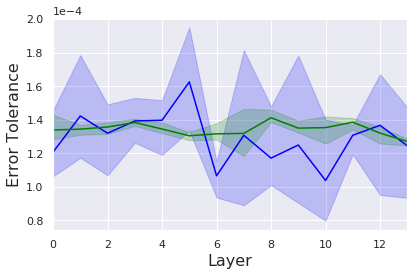

In [4]:
save_dir = './figures_neurips'
save_name = 'error_tolerance.pdf'

sns.set(style="darkgrid")


dat1 = [[0, 0.00011013], [1, 0.00017845], [2, 0.00010682], [3, 0.00013848], [4, 0.00015159], [5, 0.00015896], 
       [6, 0.000093556], [7, 0.000088943], [8, 0.00010094], [9, 0.00010598], [10, 0.00014002], [11, 0.00013577],
       [12, 0.000095082], [13, 0.00011902]]

dat2 = [[0, 0.0001062], [1, 0.00013085], [2, 0.00013973], [3, 0.00012618], [4, 0.00011897], [5, 0.00019499],
        [6, 0.00011513], [7, 0.00012164], [8, 0.0001023], [9, 0.00017824], [10, 0.000079779], [11, 0.00011934],
        [12, 0.00014765], [13, 0.00016087]]

dat3 = [[0, 0.00014556], [1, 0.00011724], [2, 0.0001491], [3, 0.00015297], [4, 0.00014836], [5, 0.0001335],
        [6, 0.00011081], [7, 0.00018139], [8, 0.00014794], [9, 0.000090359], [10, 0.000091374], [11, 0.00013688],
        [12, 0.0001671], [13, 0.000093403]]

dat1val = [[0, 0.0001429], [1, 0.00013683], [2, 0.00013693], [3, 0.00014054], [4, 0.00013816], [5, 0.00013083],
           [6, 0.00013788], [7, 0.00013052], [8, 0.00014589], [9, 0.00013319], [10, 0.00013802], [11, 0.00014091], 
           [12, 0.00013445], [13, 0.00012454]]

dat2val = [[0, 0.00013026], [1, 0.00013514], [2, 0.00013839], [3, 0.00013626], [4, 0.00013192], [5, 0.00013264],
           [6, 0.00012859], [7, 0.00011837], [8, 0.00013894], [9, 0.00013935], [10, 0.00012573], [11, 0.00013407], 
           [12, 0.00012576], [13, 0.00012857]]

dat3val = [[0, 0.00012826], [1, 0.00013097], [2, 0.00013152], [3, 0.00013806], [4, 0.00013309], [5, 0.00012768],
           [6, 0.0001281], [7, 0.00014644], [8, 0.00013855], [9, 0.00013226], [10, 0.00014192], [11, 0.00014046],
           [12, 0.00013567], [13, 0.00012784]]

dat = [dat1, dat2, dat3]

datval = [dat1val, dat2val, dat3val]

df = []

dfval = []

for d in dat:
    df.append(pd.DataFrame(d, columns=['step', 'value']))

df = pd.concat(df, keys=['run1','run2','run3'])  

for dv in datval:
    dfval.append(pd.DataFrame(dv, columns=['step', 'value']))

dfval = pd.concat(dfval, keys=['run1','run2','run3'])  

sns_plot = sns.lineplot(x="step", y="value", data=df, label='error tolerance', color='blue')
sns_plot = sns.lineplot(x="step", y="value", data=dfval, label='error tolerance', color='green')


sns_plot.set_xlabel('Layer', fontsize = 16)
sns_plot.set_ylabel('Error Tolerance', fontsize = 16)
sns_plot.set_xlim(0,13)
sns_plot.ticklabel_format(style='sci', axis='y', scilimits=(-4,-4))
sns_plot.legend().set_visible(False)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


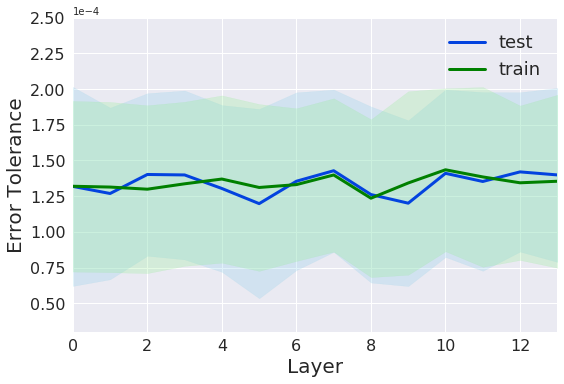

In [26]:
from matplotlib import pyplot as pl
import matplotlib as mpl
import numpy as np

save_dir = './figures_neurips'
save_name = 'error_tolerance.pdf'

sns.set(style="darkgrid")


tol_mean_test = [0.00013184761, 0.00012687307, 0.00014019734, 0.00013987228, 0.00013038579, 0.000119779914, 0.00013547207, 0.00014282574, 0.00012614591, 0.00012008995, 0.0001410076, 0.00013529563, 0.00014201112, 0.000139892]
tol_std_test = [6.970813e-05, 6.0081504e-05, 5.6902252e-05, 5.9141257e-05, 5.8393773e-05, 6.627665e-05, 6.222492e-05, 5.683167e-05, 6.164351e-05, 5.8027395e-05, 5.8616166e-05, 6.25694e-05, 5.578829e-05, 6.0907176e-05]

tol_mean_test = np.array(tol_mean_test)
tol_std_test = np.array(tol_std_test)

tol_mean_train = [0.00013194671, 0.00013138472, 0.00012988756, 0.00013366454, 0.00013700279, 0.00013109697, 0.00013309563, 0.0001398474, 0.00012357831, 0.0001342403, 0.00014348961, 0.00013848743, 0.00013437569, 0.0001354436]
tol_std_train = [5.9741178e-05, 5.9628364e-05, 5.8784408e-05, 5.7465397e-05, 5.8589783e-05, 5.842533e-05, 5.346788e-05, 5.369754e-05, 5.5242188e-05, 6.426139e-05, 5.706977e-05, 6.295584e-05, 5.4060823e-05, 6.055073e-05]

tol_mean_train = np.array(tol_mean_train)
tol_std_train = np.array(tol_std_train)


lay_index = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13])

mpl.style.use('seaborn')
fig = pl.figure()
pl.plot(lay_index, tol_mean_test, '-', color='#0343df', linewidth=3, label='test')
pl.fill_between(lay_index, tol_mean_test-tol_std_test, tol_mean_test+tol_std_test, alpha=0.25, color='skyblue')

pl.plot(lay_index, tol_mean_train, '-', color='green', linewidth=3, label='train')
pl.fill_between(lay_index, tol_mean_train-tol_std_train, tol_mean_train+tol_std_train, alpha=0.25, color='lightgreen')

pl.xlabel('Layer', fontsize = 20)
pl.ylabel('Error Tolerance', fontsize = 20)
pl.xlim(0,13)
pl.ylim(0.00003,0.00025)
pl.ticklabel_format(style='sci', axis='y', scilimits=(-4,-4))
pl.tick_params(axis='both', which='major', labelsize=16)
pl.legend(prop={'size': 18})

pl.show()

fig.savefig(os.path.join(save_dir, save_name))

# df = pd.DataFrame.from_dict({
#     "mean": tol_mean_test,
#     "std": tol_std_test
# }).reset_index()

# g = sns.FacetGrid(df, size=6)
# ax = g.map(plt.errorbar, "index", "mean", "std")
# ax.set(xlabel="", ylabel="")
